In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../gurgaon_data/gurgaon_properties_cleaned_v2.csv')

In [4]:
df.sample(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3652,house,emaar mgf marbella,sector 66,8.80,41615.0,2115.0,Built Up area: 267 (223.25 sq.m.),4,4,3+,...,NaN,267.00,NaN,0,1,1,1,0,1,107
2533,house,independent,sector 56,11.95,43534.0,2745.0,Plot area 305(255.02 sq.m.),12,12,3+,...,NaN,2744.02,NaN,0,1,0,0,0,2,21


In [5]:
df.shape

(3803, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1726 non-null   float64
 15  carpet_area          1944 non-null   f

In [7]:
df.duplicated().sum()

np.int64(126)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(3677, 23)

In [10]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

## property_type

<Axes: xlabel='property_type'>

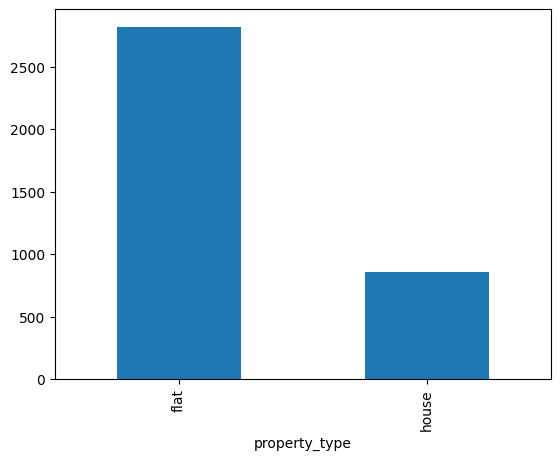

In [ ]:
df['property_type'].value_counts().plot(kind='bar')

### Observations
- Flats are in majority(75 percent) and there are less number of houses(~25 percent)
-No missing values

## society

In [11]:
df['society'].value_counts()

society
independent                             486
tulip violet                             75
ss the leaf                              73
shapoorji pallonji joyville gurugram     42
dlf new town heights                     42
                                       ... 
rail vihar cghs                           1
rk tower                                  1
antriksh green                            1
imperia elvedor                           1
m3m golf hills                            1
Name: count, Length: 676, dtype: int64

In [12]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023511
ss the leaf                             0.046395
shapoorji pallonji joyville gurugram    0.059561
dlf new town heights                    0.072727
signature global park                   0.083699
                                          ...   
ramsons kshitij                         0.490282
ats kocoon                              0.494357
ansal heights 86                        0.498433
ireo the corridors                      0.502194
mvn athens                              0.505956
Name: proportion, Length: 75, dtype: float64

In [13]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': np.int64(1),
 'High (50-100)': np.int64(2),
 'Average (10-49)': np.int64(92),
 'Low (2-9)': np.int64(273),
 'Very Low (1)': np.int64(308)}

<Axes: xlabel='society'>

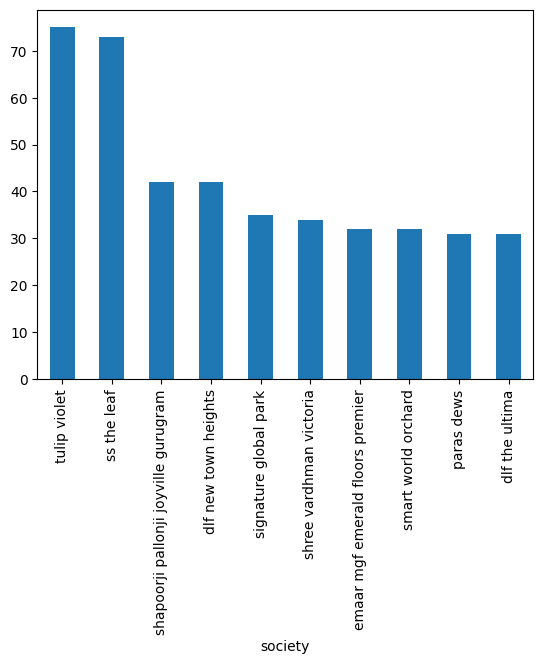

In [14]:
# top 10 socities

df['society'][df['society'] != 'independent'].value_counts().head(10).plot(kind='bar')

In [15]:
df['society'].isnull().sum()

np.int64(1)

In [16]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2693,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,1,0


Observations
- Around 13% properties comes under independent tag.
There are 675 societies.
- The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
- Very High (>100): Only 1 society has more than 100 listings.
- High (50-100): 2 societies have between 50 to 100 listings.
- Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
- Low (2-9): 273 societies have between 2 to 9 listings.
- Very Low (1): A significant number, 308 societies, have only 1 listing.
1 missing value

# sector

In [17]:
df['sector'].value_counts().shape

(113,)

In [18]:
df['sector'].value_counts(normalize=True).cumsum().head(50)

sector
sohna road    0.041882
sector 85     0.071254
sector 102    0.100354
sector 92     0.127550
sector 69     0.152842
sector 90     0.177047
sector 81     0.200707
sector 65     0.224368
sector 109    0.247756
sector 79     0.268425
sector 33     0.287191
sector 104    0.305956
sector 83     0.324449
sector 43     0.342127
sector 86     0.359532
sector 50     0.376938
sector 37d    0.394071
sector 2      0.410933
sector 95     0.427794
sector 107    0.444112
sector 108    0.460158
sector 89     0.475660
sector 56     0.490889
sector 48     0.505847
sector 70a    0.520533
sector 37c    0.534403
sector 26     0.548001
sector 70     0.561599
sector 84     0.574925
sector 4      0.588251
sector 49     0.601305
sector 67     0.614088
sector 66     0.626598
sector 28     0.638564
sector 113    0.650258
sector 103    0.661681
sector 25     0.673103
sector 82     0.684253
sector 61     0.695404
sector 7      0.706010
sector 106    0.716345
sector 12     0.726135
manesar       0.735110
sect

<Axes: xlabel='sector'>

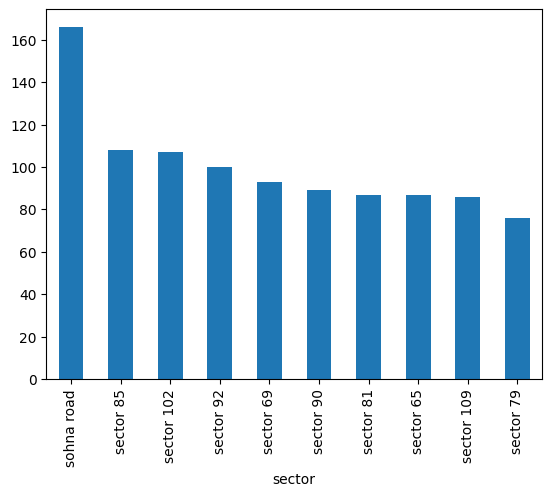

In [ ]:
df['sector'].value_counts().head(10).plot(kind='bar')

In [23]:
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts>=100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': np.int64(4),
 'High (50-100)': np.int64(25),
 'Average (10-49)': np.int64(63),
 'Low (2-9)': np.int64(21),
 'Very Low (1)': np.int64(1)}

In [20]:
sector_counts

sector
sohna road    154
sector 85     108
sector 102    107
sector 92     100
sector 69      93
             ... 
sector 17b      3
sector 73       3
sector 88b      3
sector 27       3
sector 37       1
Name: count, Length: 113, dtype: int64

In [21]:
pd.DataFrame(sector_counts)

,count
sector,
sohna road,154
sector 85,108
sector 102,107
sector 92,100
sector 69,93
...,...
sector 17b,3
sector 73,3
sector 88b,3


Observations
- There are a total of 104 unique sectors in the dataset.
- Frequency distribution of sectors:
  + Very High (>100): 3 sectors have more than 100 listings.
  + High (50-100): 25 sectors have between 50 to 100 listings.
  + Average (10-49): A majority, 60 sectors, fall in this range with 10 to 49
  listings each.
  + Low (2-9): 16 sectors have between 2 to 9 listings.
Very Low (1): Interestingly, there are no sectors with only 1 listing.

# Price

In [24]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

In [51]:
df['price'].isnull().sum()

np.int64(17)

In [52]:
df[df['price'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
38,house,emaar mgf marbella,sector 66,NaN,NaN,NaN,Plot area 350(292.64 sq.m.),5,5,3,...,NaN,3148.81,NaN,0,0,0,0,0,2,22
304,house,not applicable,sector 4,NaN,NaN,NaN,Plot area 670(560.21 sq.m.),5,3,2,...,NaN,6027.86,NaN,0,0,0,0,0,1,0
401,house,independent,sector 11,NaN,NaN,NaN,Plot area 1000(92.9 sq.m.),2,2,1,...,NaN,999.60,NaN,0,0,0,0,0,1,0
596,house,emaar mgf marbella,sector 66,NaN,NaN,NaN,Plot area 350(292.64 sq.m.)Built Up area: 6500...,4,4,3+,...,NaN,6500.00,NaN,1,1,1,1,0,1,136
813,house,unitech greenwood city,sector 45,NaN,NaN,NaN,Plot area 240(200.67 sq.m.),9,9,3+,...,NaN,2159.21,NaN,1,1,0,0,0,0,110
922,house,emaar mgf marbella,sector 66,NaN,NaN,NaN,Plot area 350(292.64 sq.m.),5,5,3+,...,NaN,3148.81,NaN,1,1,0,1,0,2,160
1419,house,unitech uniworld resorts,sector 33,NaN,NaN,NaN,Plot area 502(419.74 sq.m.),5,7,3+,...,NaN,4516.40,NaN,0,1,0,0,0,1,87
1481,house,independent,sector 25,NaN,NaN,NaN,Plot area 502(419.74 sq.m.)Built Up area: 450 ...,5,5,3+,...,NaN,450.00,400.00,1,1,0,1,1,2,49
1974,flat,signature global orchard avenue 2,sector 93,NaN,NaN,NaN,Carpet area: 577.11 (53.62 sq.m.),2,2,3,...,NaN,NaN,577.11,0,0,0,0,0,1,104
2013,house,dlf city plot phase 3,sector 24,NaN,NaN,NaN,Built Up area: 5000 (464.52 sq.m.),5,5,3+,...,NaN,5000.00,NaN,0,0,0,0,0,1,0


<Axes: xlabel='price', ylabel='Count'>

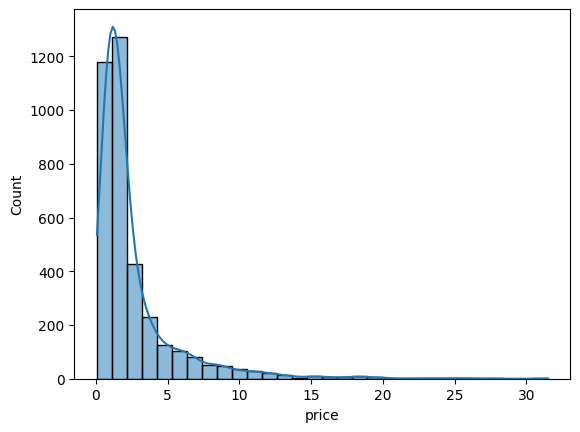

In [33]:
sns.histplot(df['price'], kde=True, bins=30)

#right skewed graph

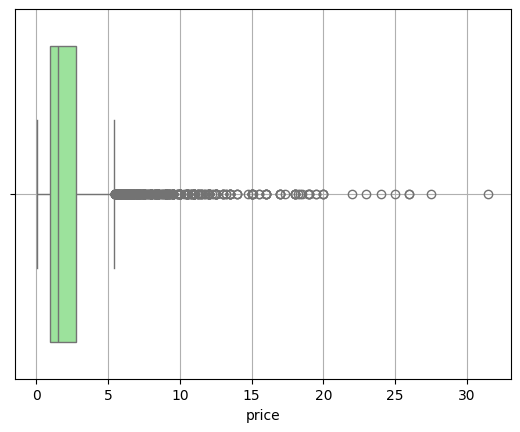

In [37]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

- Descriptive Statistics:
  + Count: There are 3,660 non-missing price entries.
  + Mean Price: The average price is approximately 2.53 crores.
  + Median Price: The median (or 50th percentile) price is 1.52 crores.
  + Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
  + Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
  + IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.


- Visualizations:

  + Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
  + Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
- Missing Values: There are 17 missing values in the price column.

In [61]:
#skewness and kurtosis

skewness_price = df['price'].skew()
kurtosis_price = df['price'].kurtosis()

print("Skewness:", skewness_price)
print("Kurtosis:", kurtosis_price)

Skewness: 3.2791704733134623
Kurtosis: 14.933372629214258


Skewness: The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

Kurtosis: The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [64]:
quantile_price = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

print(quantile_price)

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.264
Name: price, dtype: float64


- Quantile Analysis:

  + 1% Quantile: Only 1% of properties are priced below 0.25 crores.
  + 5% Quantile: 5% of properties are priced below 0.37 crores.
  + 95% Quantile: 95% of properties are priced below 8.5 crores.
  + 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [67]:
 # Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']

IQR = Q3 - Q1
print(IQR)

1.8


In [68]:
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR


print("Upper Bound:", upper_bound)
print("Lower Bound:", lower_bound)

Upper Bound: 5.45
Lower Bound: -1.7500000000000002


In [69]:
outliers = df[((df['price']<lower_bound)  | (df['price']>upper_bound))]
outliers.shape

(425, 23)

In [70]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

Outliers Analysis (using IQR method):

- Based on the IQR method, there are 425 properties considered as outliers.
- These outliers have an average price of approximately 9.24 crores.
- The range for these outliers is from 5.46 crores to 31.5 crores.

<Axes: xlabel='price'>

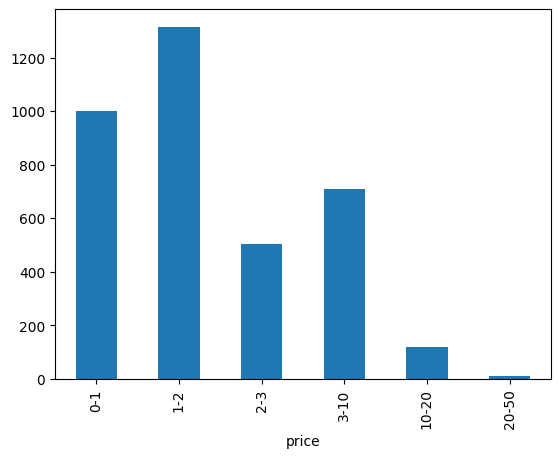

In [71]:
#price binning

bins = [0, 1, 2, 3, 10, 20, 50]
bin_labels = ['0-1', '1-2', '2-3', '3-10', '10-20', '20-50']

pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

- The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
- There's a significant drop in the number of properties priced above "5 crores."


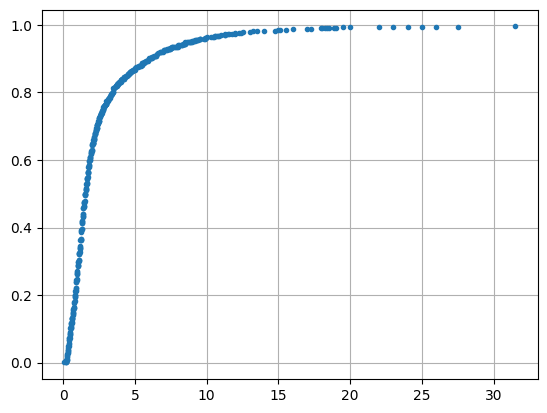

In [72]:
#ecdf plot

ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

In [74]:
pd.DataFrame(df['price'].value_counts().sort_index().cumsum() / len(df['price']))

,count
price,
0.07,0.000272
0.16,0.000544
0.17,0.000816
0.19,0.001088
0.20,0.003264
...,...
24.00,0.994017
25.00,0.994289
26.00,0.994833


In [75]:
len(df['price'])

3677

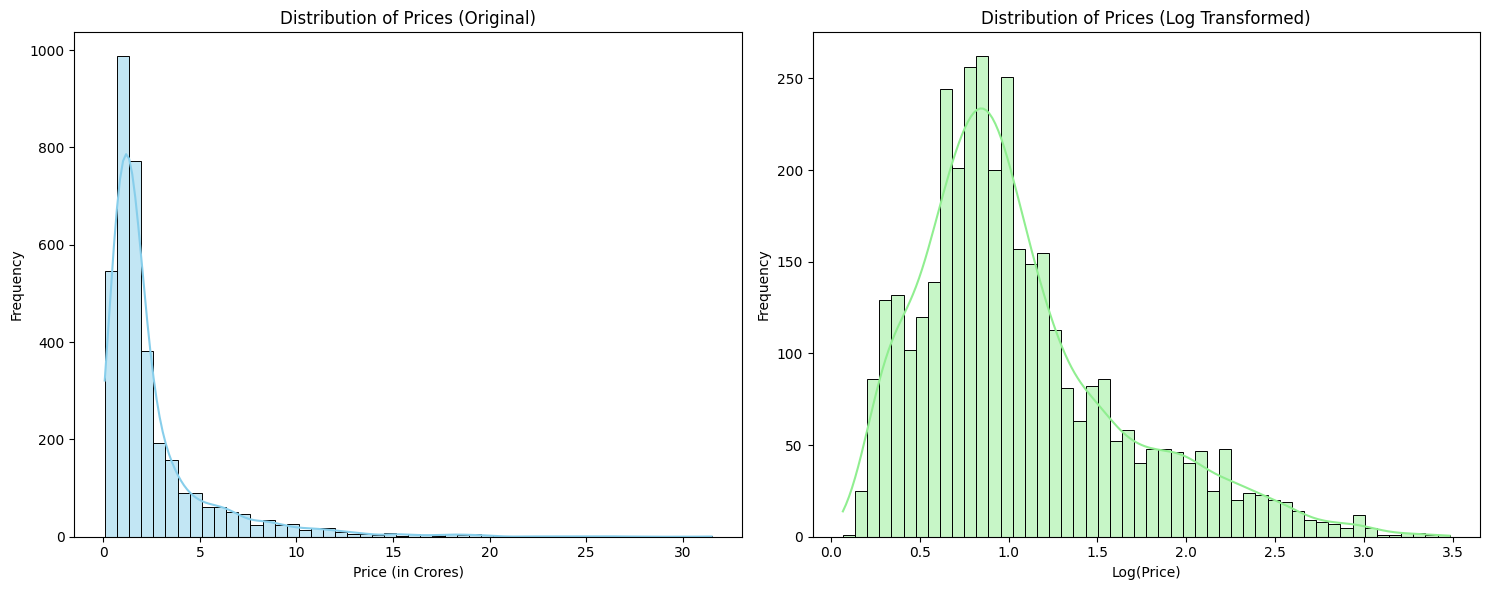

In [76]:
plt.figure(figsize=(15,6))
# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [77]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()
print(skewness,kurtosis)

1.0740709565255315 0.9646692415449296


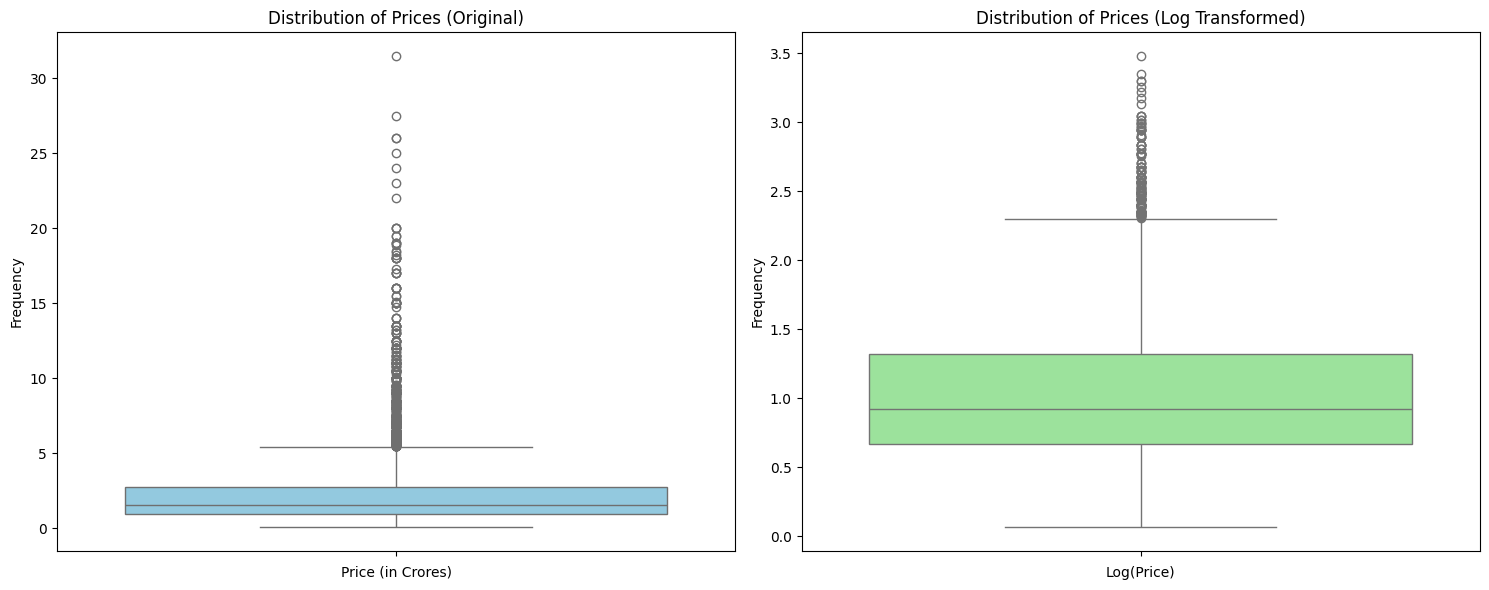

In [78]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# price_per_sqft

In [79]:
df['price_per_sqft'].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [80]:
df['price_per_sqft'].isnull().sum()

np.int64(17)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

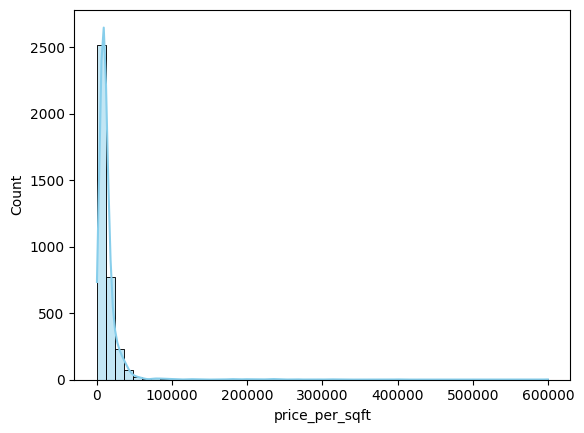

In [81]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)


Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

<Axes: xlabel='price_per_sqft'>

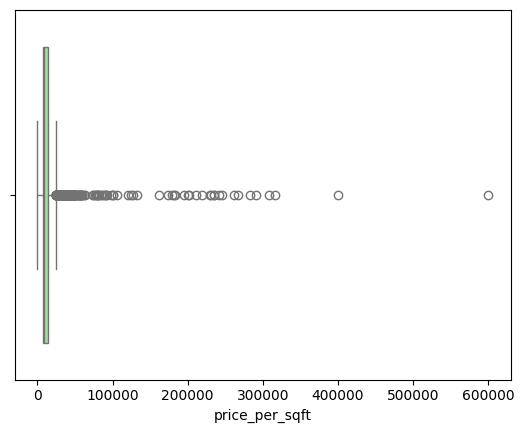

In [82]:
sns.boxplot(x=df['price_per_sqft'], color='lightgreen')


The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outlier


- Observations
 + Potential Outliers
 + Right Skewed
 + 17 missing values

# bedroom

In [83]:
df['bedRoom'].isnull().sum()

np.int64(0)

<Axes: xlabel='bedRoom'>

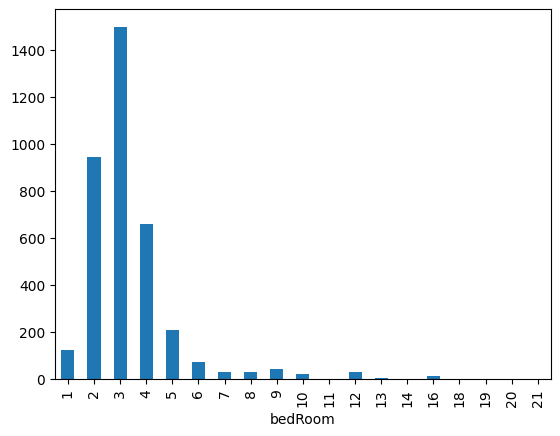

In [84]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

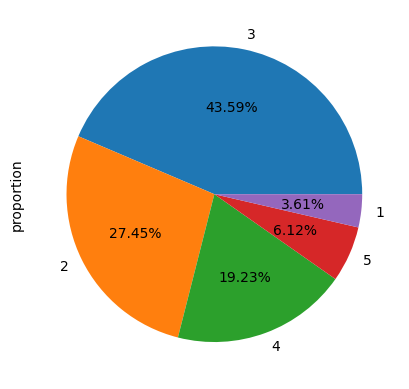

In [85]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

# bathroom

In [86]:
df['bathroom'].isnull().sum()

np.int64(0)

<Axes: xlabel='bathroom'>

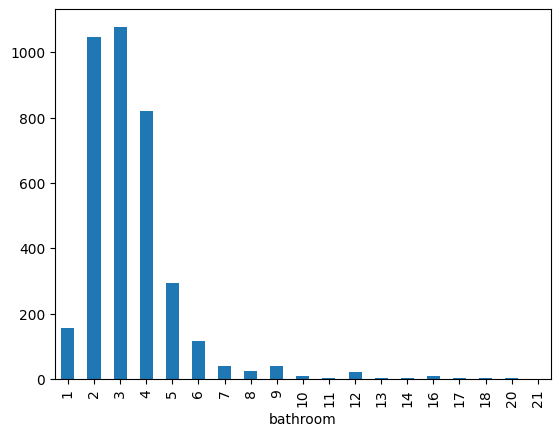

In [87]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

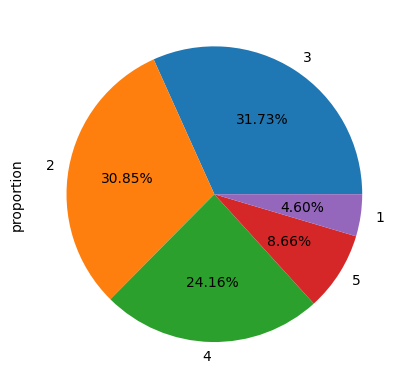

In [88]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [89]:
df.sample(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1492,house,independent,sector 105,0.37,8222.0,450.0,Plot area 450(41.81 sq.m.),2,2,1,...,NaN,449.88,NaN,0,0,0,0,1,1,0
535,flat,bestech park view grand spa,sector 81,2.35,8834.0,2660.0,Super Built up area 2660(247.12 sq.m.)Carpet a...,3,4,3+,...,2660.0,NaN,2356.00,0,1,0,0,0,2,101
2094,flat,gls arawali homes,sohna road,0.30,6243.0,481.0,Super Built up area 567(52.68 sq.m.)Carpet are...,2,2,2,...,567.0,NaN,480.53,0,0,0,0,0,0,120


# balcony

In [90]:
df['balcony'].isnull().sum()

np.int64(0)

In [91]:
df['balcony'].describe()

count     3677
unique       5
top         3+
freq      1172
Name: balcony, dtype: object

<Axes: xlabel='balcony'>

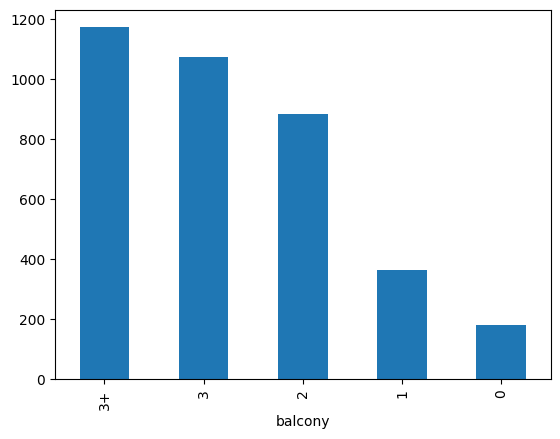

In [92]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

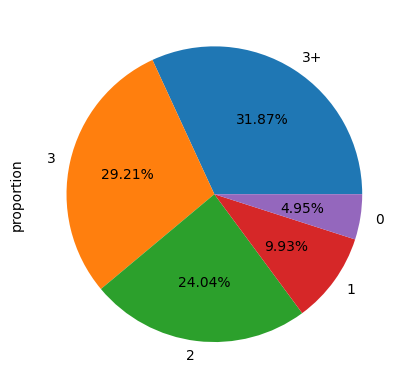

In [93]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

# floorNum

In [94]:
df.iloc[:,10:].head()

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,1,8
1,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,1,38
2,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,1,15
3,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,1,49
4,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,2,174


In [95]:
df['floorNum'].isnull().sum()

np.int64(19)

In [96]:
df['floorNum'].describe()

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

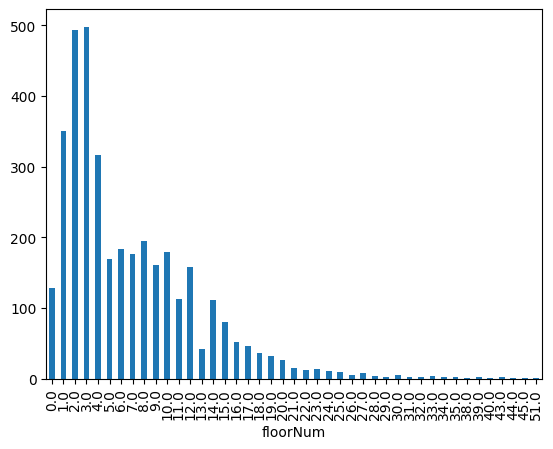

In [97]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='floorNum'>

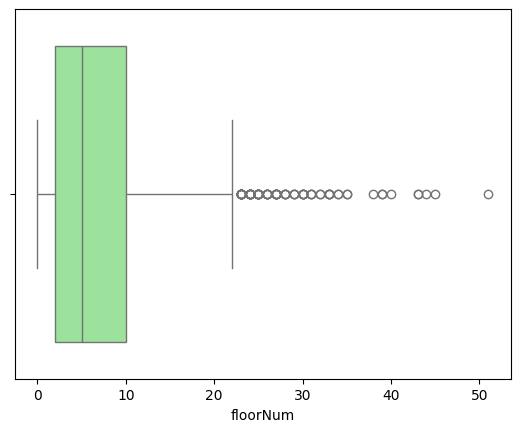

In [98]:
sns.boxplot(x= df['floorNum'], color='lightgreen')

- The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

# facing

In [99]:
df['facing'].isnull().sum()

np.int64(1045)

In [100]:
df['facing'].fillna('NA',inplace=True)

C:\Users\nitis\AppData\Local\Temp\ipykernel_2908\3692945726.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['facing'].fillna('NA',inplace=True)


In [101]:
df['facing'].value_counts()

facing
NA            1045
North-East     623
East           623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

# agePossession

In [102]:
df['agePossession'].isnull().sum()

np.int64(0)

In [103]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           593
Moderately Old         563
Undefined              306
Old Property           303
Under Construction     266
Name: count, dtype: int64

# area

In [104]:
# super built up area
df['super_built_up_area'].isnull().sum()

np.int64(1802)

In [105]:
df['super_built_up_area'].value_counts()

super_built_up_area
1650.0    37
1950.0    37
1578.0    25
2000.0    25
2150.0    22
          ..
2341.0     1
1587.0     1
2030.0     1
2380.0     1
1523.0     1
Name: count, Length: 593, dtype: int64

In [106]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

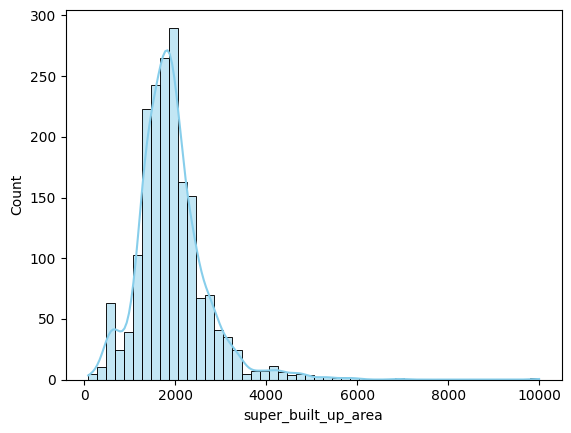

In [107]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: xlabel='super_built_up_area'>

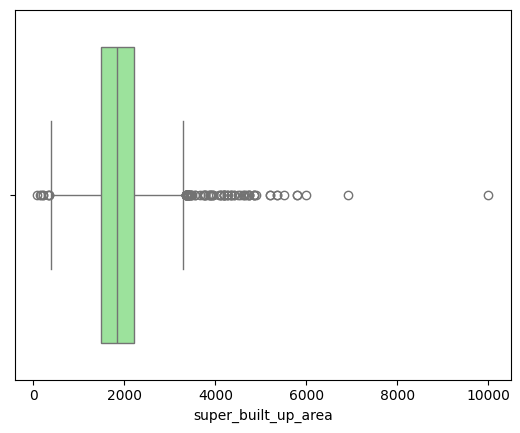

In [108]:
sns.boxplot(x= df['super_built_up_area'].dropna(), color='lightgreen')

- Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

In [109]:
# built up area
df['built_up_area'].isnull().sum()

np.int64(1994)

In [110]:
df['built_up_area'].describe()

count      1683.000000
mean       2482.049846
std       18087.282829
min          30.000000
25%        1150.000000
50%        1700.000000
75%        2429.070000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

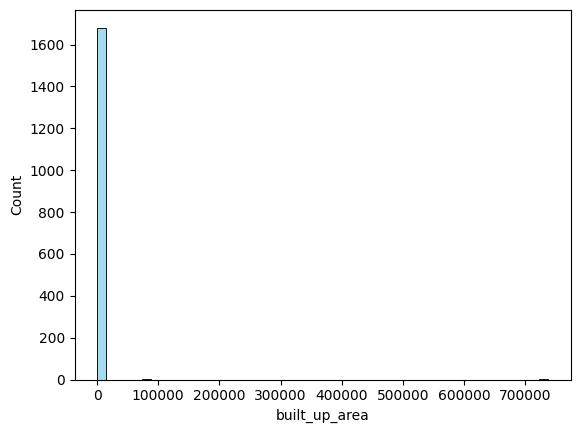

In [111]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: xlabel='built_up_area'>

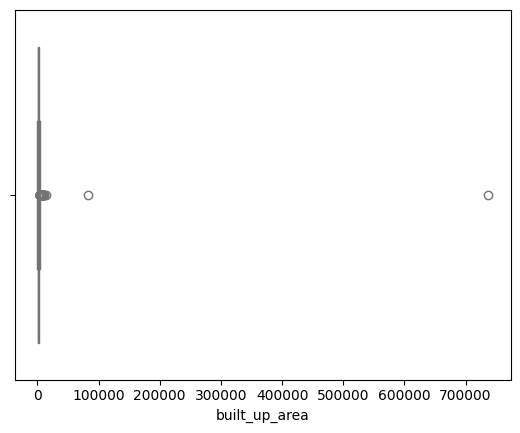

In [112]:
sns.boxplot(x=df['built_up_area'].dropna(), color='lightgreen')

- Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
- There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
- The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.
- The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

In [113]:
# carpet area
df['carpet_area'].isnull().sum()

np.int64(1805)

In [114]:
df['carpet_area'].describe()

count      1872.000000
mean       2529.179578
std       22799.836442
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

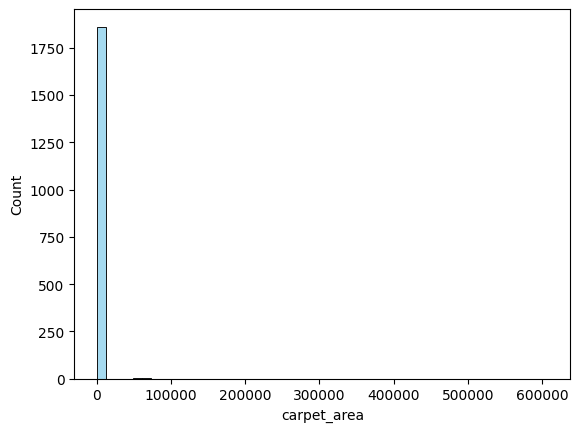

In [115]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: xlabel='carpet_area'>

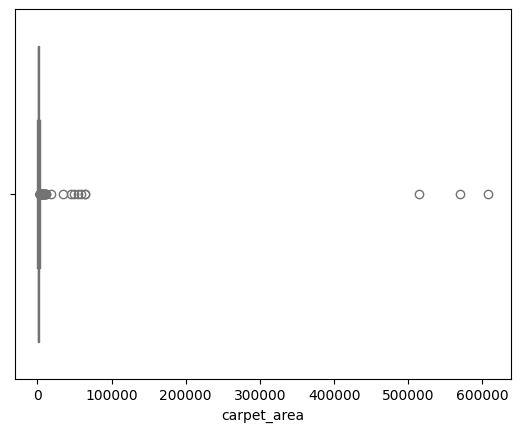

In [116]:
sns.boxplot(x=df['carpet_area'].dropna(), color='lightgreen')

In [117]:
df.iloc[:,16:]

,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,0,0,0,0,1,8
1,1,1,0,0,0,1,38
2,0,0,0,0,0,1,15
3,0,0,0,0,0,1,49
4,0,1,0,0,1,2,174
...,...,...,...,...,...,...,...
3798,0,0,0,0,0,1,73
3799,1,1,1,1,0,1,160
3800,0,0,0,0,0,2,67
3801,1,1,1,1,0,1,76


# additonal room

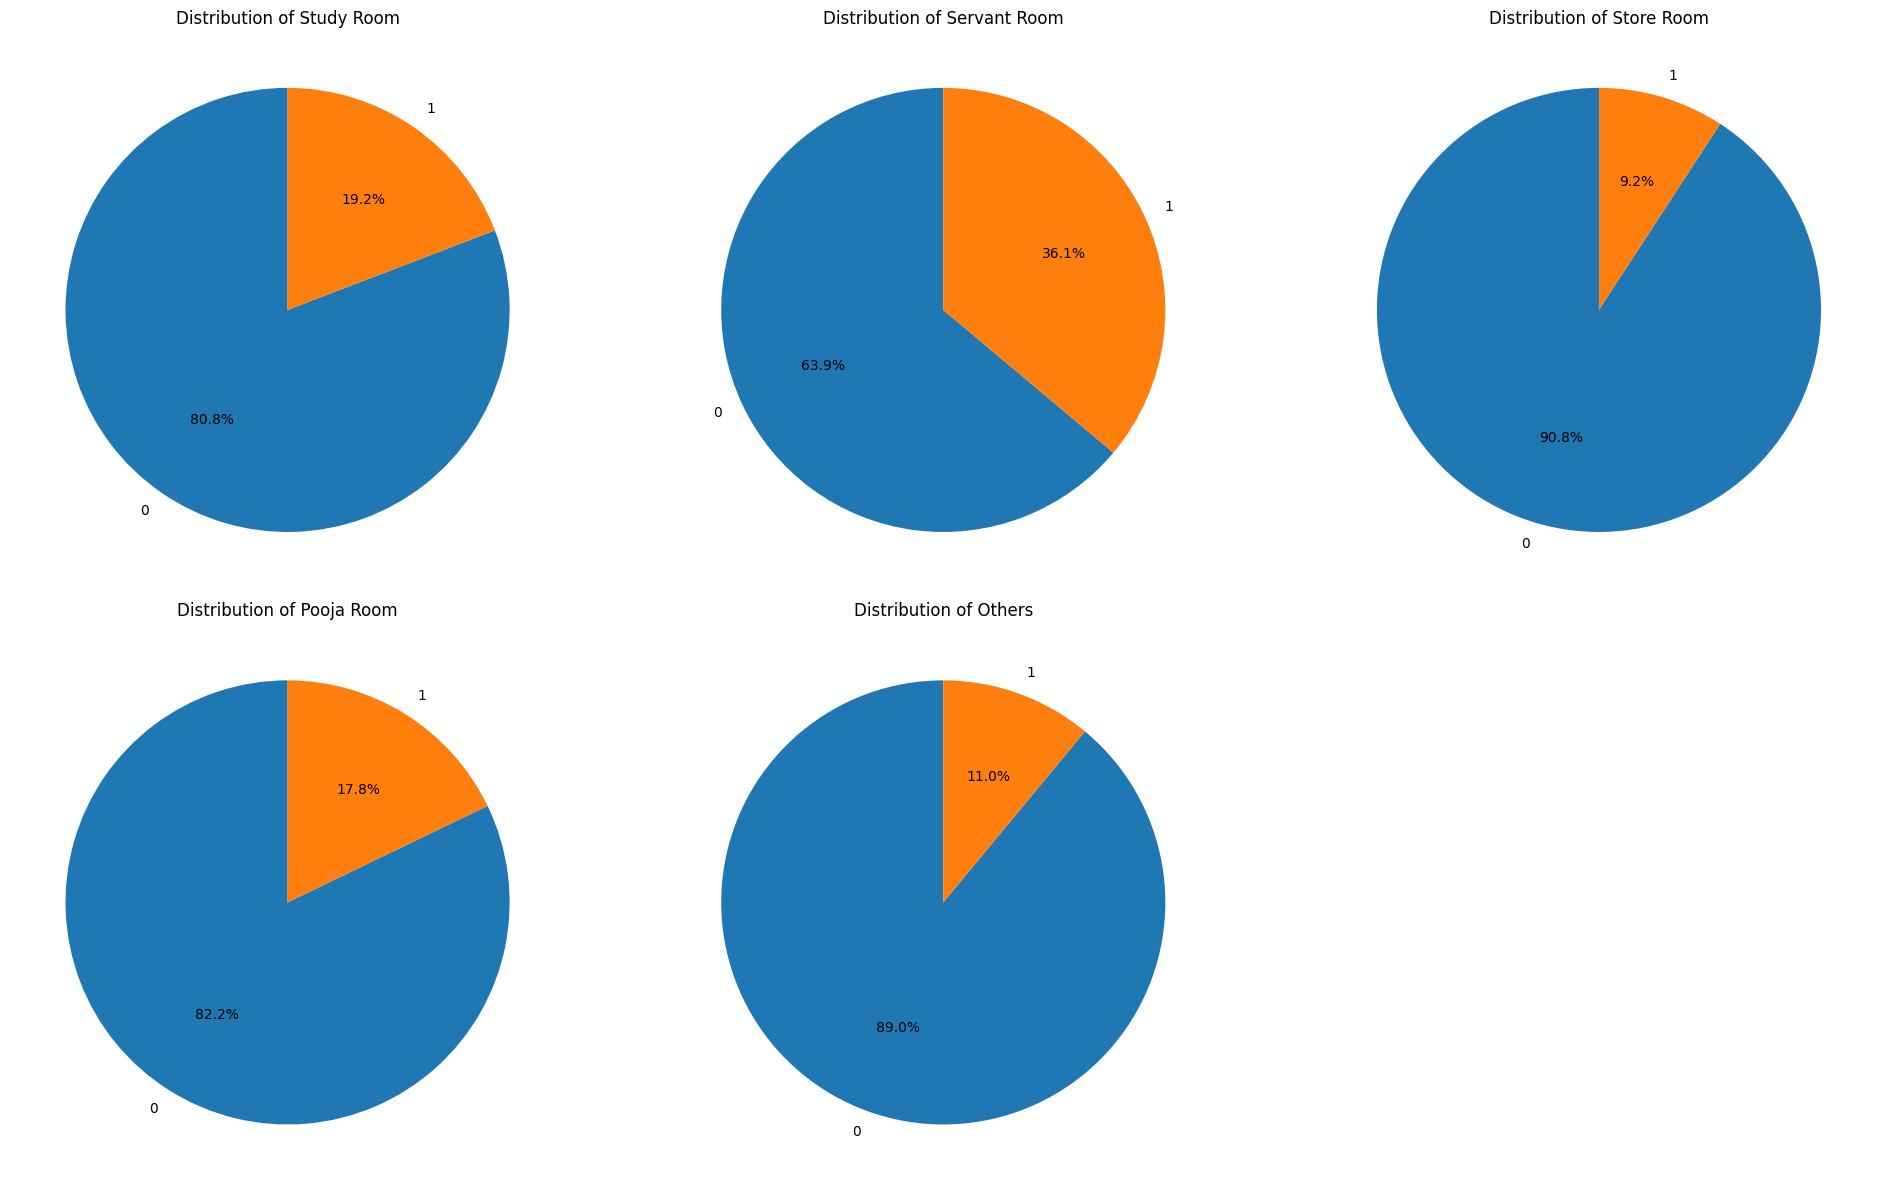

In [118]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

# furnishing_type

In [119]:
df['furnishing_type'].value_counts()

furnishing_type
1    2436
2    1038
0     203
Name: count, dtype: int64

<Axes: ylabel='count'>

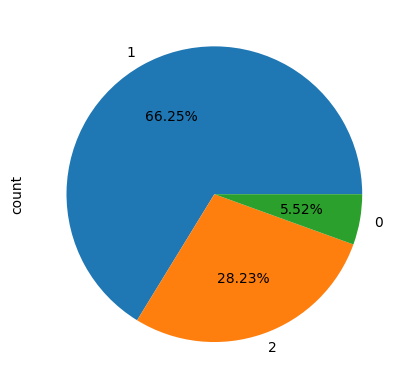

In [120]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')


# luxury score

In [121]:
df['luxury_score'].isnull().sum()

np.int64(0)

In [122]:
df['luxury_score'].describe()

count    3677.000000
mean       71.512918
std        53.059082
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

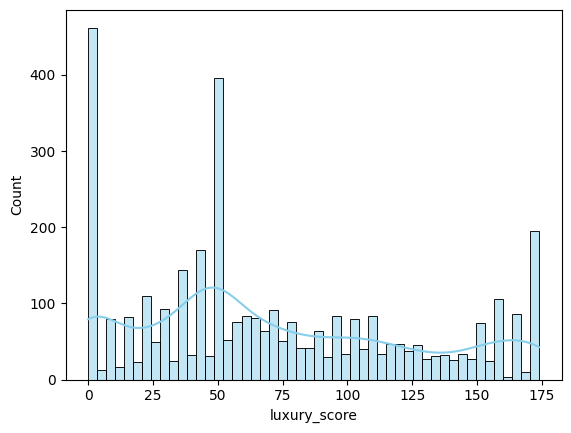

In [123]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='luxury_score'>

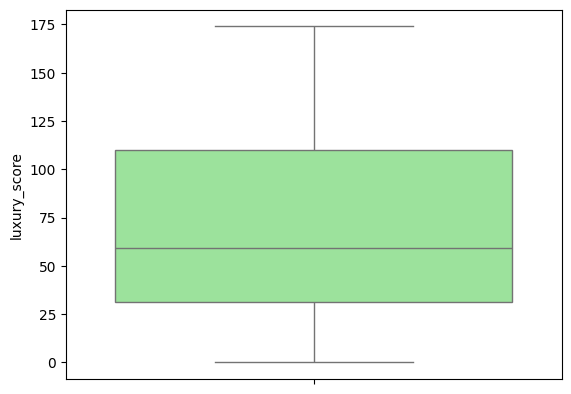

In [124]:
sns.boxplot(df['luxury_score'], color='lightgreen')

The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values

In [125]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,1,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,1,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,1,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,1,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,2,174
